In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def loadDataSet(path):
    data = np.loadtxt(path, delimiter=',',skiprows=1) 
    sorted_data = sorted(data[:], key = lambda x: x[2])
    class1 = []
    class2 = []
    for i in range(len(sorted_data)):
        if(sorted_data[i][2] == 0):
            class1.append([sorted_data[i][0], sorted_data[i][1]])
        else:
            class2.append([sorted_data[i][0], sorted_data[i][1]])
    return (np.array(class1), np.array(class2))

In [3]:
def euclid_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [4]:
def NearestNeighbor(weight, height):
    global class1
    global class2
    len1 = len(class1)
    len2 = len(class2)
    
    distance_from_class1 = 0
    for i in range(len1):
        distance_from_class1 += euclid_distance(class1[i], np.array((weight, height)))
    
    distance_from_class2 = 0
    for i in range(len2):
        distance_from_class2 += euclid_distance(class2[i], np.array((weight, height)))
    
    if(distance_from_class1/len1 < distance_from_class2/len2):
        class1 = np.vstack((class1, np.array((weight, height))))
        fig = plt.figure()
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.show()
        return 1
    else:
        class2 = np.vstack((class2, np.array((weight, height))))
        fig = plt.figure()
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.show()
        return 2

Do you want to proceed? Press y/ny
Enter Weight:100
Enter Height:6.2


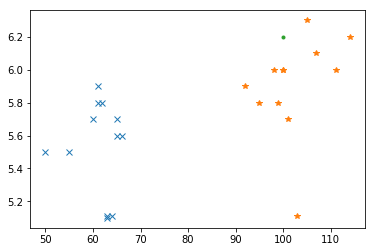

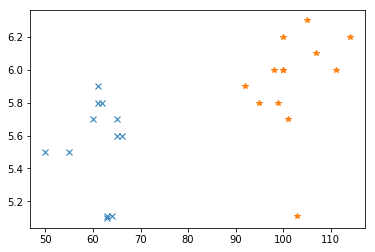

Predicted Class is:2


In [ ]:
if __name__=="__main__":
    while(1):
        decision = input('Do you want to proceed? Press y/n')
        if (decision == 'n' or decision == 'N'):
            break
        weight = float(input('Enter Weight:'))
        height = float(input('Enter Height:'))
        path = 'NNData.csv'
        (class1, class2) = loadDataSet(path)
        fig = plt.figure()
        plt.plot(class1[:, 0], class1[:, 1], 'x')
        plt.plot(class2[:, 0], class2[:, 1], '*')
        plt.plot(weight, height, '.')
        plt.show()
        x = NearestNeighbor(weight, height)
        print('Predicted Class is:'+str(x))
        with open(path, 'a', newline='') as newFile:
            newFileWriter = csv.writer(newFile)
            newFileWriter.writerow([weight, height, x-1])